In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics 

In [2]:
#read in the csv files 
city_df = pd.read_csv("Resources/city_data.csv")
print(city_df.head())
ride_df = pd.read_csv("Resources/ride_data.csv")
ride_df.head()

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344

In [3]:
#check null values and types
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
#unique city types
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [5]:
#how many of each city type are present
Urban_count= sum(city_df["type"]== "Urban")
Rural_count= sum(city_df["type"]=="Rural")
Suburban_count =sum(city_df["type"]=="Suburban")
print(f"Urban Count: {Urban_count}")
print(f"Rural Count: {Rural_count}")
print(f"Suburban Count: {Suburban_count}")

Urban Count: 66
Rural Count: 18
Suburban Count: 36


In [6]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [7]:
#create merged data frame
cityrides_df= pd.merge(ride_df,city_df,how="left",on=["city","city"])
cityrides_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [18]:
# Create the city type DataFrames.
urban_cities_df = cityrides_df[cityrides_df["type"] == "Urban"]
suburban_cities_df = cityrides_df[cityrides_df["type"] == "Suburban"]
rural_cities_df = cityrides_df[cityrides_df["type"] == "Rural"]
print(urban_cities_df.head())

print("--------------------------")

print(suburban_cities_df.head())

print("--------------------------")

print(rural_cities_df.head())



                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  
--------------------------
               city                 date   fare        ride_id  driver_count  \
1625  Barronchester  2019-01-27 03:08:01  27.79  6653622887913            11   
1626  East Kentstad  2019-04-07 19:44:19  18.75  6575961095852            20   
1627      Lake Omar  2019-01-17 21:33:35  21.71   966911700371            22   
1628     Myersshire  2019-02-27 17:38:39  17.10  5706770909868            19   
1629    West H

In [19]:
# total number of rides per city in each city type
urban_ride_totals = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_totals = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_totals = rural_cities_df.groupby(["city"]).count()["ride_id"]
print(urban_ride_totals.head())

print("--------------------------")
      
print(suburban_ride_totals.head())

print("---------------------------")

print(rural_ride_totals.head())


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64
--------------------------
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
---------------------------
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [21]:
# calculate average fare per city and per city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
print(urban_avg_fare.head())
print("----------------------")
print(suburban_avg_fare.head())
print("-----------------------")
print(rural_avg_fare.head())
      

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
----------------------
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
-----------------------
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [23]:
#calculate average driver count per city and per city type
urban_avg_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_avg_driver_count.head())
print("---------------------")
print(suburban_avg_driver_count.head())
print("----------------------")
print(rural_avg_driver_count.head())

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64
---------------------
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
----------------------
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


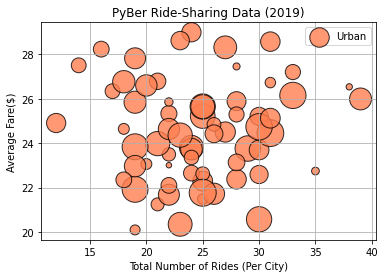

In [37]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_totals, urban_avg_fare, color="coral", alpha =0.8, s=[i * 10 for i in urban_avg_driver_count], label="Urban",edgecolor="black")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#add a legend
plt.legend()
           

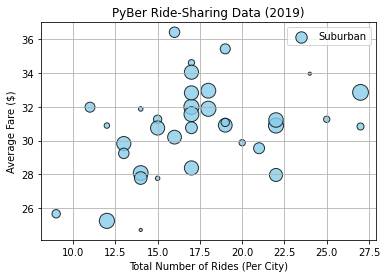

In [38]:
#create suburban cities bubble chart
plt.scatter(suburban_ride_totals,suburban_avg_fare, color ="skyblue", alpha =0.8, s= [i*10 for i in suburban_avg_driver_count], label= "Suburban",edgecolor ="black")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

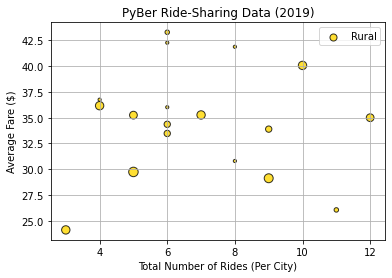

In [40]:
#create rurual cities bubble chart
plt.scatter(rural_ride_totals, rural_avg_fare, color="gold", alpha= 0.8, s=[i*10 for i in rural_avg_driver_count], edgecolor="black",label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

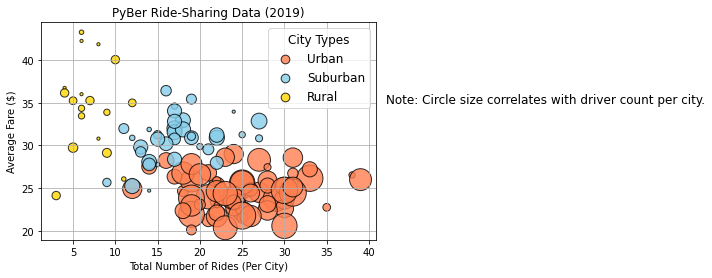

In [46]:
#merge all 3 charts
plt.scatter(urban_ride_totals, urban_avg_fare, color="coral", alpha =0.8, s=[i * 10 for i in urban_avg_driver_count], label="Urban",edgecolor="black")
plt.scatter(suburban_ride_totals,suburban_avg_fare, color ="skyblue", alpha =0.8, s= [i*10 for i in suburban_avg_driver_count], label= "Suburban",edgecolor ="black")
plt.scatter(rural_ride_totals, rural_avg_fare, color="gold", alpha= 0.8, s=[i*10 for i in rural_avg_driver_count], edgecolor="black",label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
#fix legend size
lgnd = plt.legend(fontsize= "12", mode="Expanded", scatterpoints=1, loc="best",title ="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")